In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

file = tf.keras.utils
pd.set_option('display.max_columns',40)
pd.set_option('display.max_rows',20)

dataframe = pd.read_csv(r'C:\Users\Susara\Documents\ANN\H1.csv' )
dataframe.head(10)



,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NULL,NULL,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,NULL,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,82.0,0,1,Canceled,2015-05-06
9,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15,NULL,0,Transient,105.5,0,0,Canceled,2015-04-22


In [6]:
dataframe. MarketSegment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [7]:
dataframe. CustomerType.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [8]:
dataframe. Meal.unique()

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'],
      dtype=object)

In [9]:
dataframe. ReservedRoomType.unique()

array(['C               ', 'A               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'H               ', 'L               ', 'P               ',
       'B               '], dtype=object)

In [10]:
dataframe. Company.unique()

array(['       NULL', '        110', '        113', '        270',
       '        178', '        240', '        154', '        144',
       '        307', '        268', '         59', '        204',
       '        312', '        318', '         94', '        174',
       '        274', '        195', '        223', '        317',
       '        281', '        118', '         53', '        286',
       '         12', '         47', '        324', '        342',
       '        373', '        371', '        383', '         86',
       '         82', '        218', '         88', '         31',
       '        397', '        392', '        405', '        331',
       '        367', '         20', '         83', '        416',
       '         51', '        395', '        102', '         34',
       '         84', '        360', '        394', '        457',
       '        382', '        461', '        478', '        386',
       '        112', '        486', '        421', '         

In [11]:
dataframe. Agent.unique()

array(['       NULL', '        304', '        240', '        303',
       '         15', '        241', '          8', '        250',
       '        115', '          5', '        175', '        134',
       '        156', '        243', '        242', '          3',
       '        105', '         40', '        147', '        306',
       '        184', '         96', '          2', '        127',
       '         95', '        146', '          9', '        177',
       '          6', '        143', '        244', '        149',
       '        167', '        300', '        171', '        305',
       '         67', '        196', '        152', '        142',
       '        261', '        104', '         36', '         26',
       '         29', '        258', '        110', '         71',
       '        181', '         88', '        251', '        275',
       '         69', '        248', '        208', '        256',
       '        314', '        126', '        281', '        2

In [12]:
dataframe. Country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI'],
      dtype=object)

In [13]:
dataframe['MarketSegment'].replace('Direct', 0, inplace=True)
dataframe['MarketSegment'].replace('Corporate', 1, inplace=True)
dataframe['MarketSegment'].replace('Online TA', 2, inplace=True)
dataframe['MarketSegment'].replace('Offline TA/TO', 3, inplace=True)
dataframe['MarketSegment'].replace('Complementary', 4, inplace=True)
dataframe['MarketSegment'].replace('Groups', 5, inplace=True)
dataframe

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,3,TA/TO,0,0,0,A,A,1,No Deposit,143,NULL,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,0,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,0,Direct,0,0,0,E,E,0,No Deposit,250,NULL,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,3,TA/TO,0,0,0,D,D,0,No Deposit,40,NULL,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [14]:

train, test = train_test_split(dataframe, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')
#dataframe['MarketSegment'] = pd.to_numeric(dataframe['MarketSegment'])
dataframe.head()



25638 train examples
6410 validation examples
8012 test examples


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,3,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,0,Direct,0,0,0,C,C,4,No Deposit,NULL,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,0,Direct,0,0,0,A,C,0,No Deposit,NULL,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,1,Corporate,0,0,0,A,A,0,No Deposit,304,NULL,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,2,TA/TO,0,0,0,A,A,0,No Deposit,240,NULL,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
train.head
val.head
test.head

<bound method NDFrame.head of        IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  \
31544           0        71             2017          January   
23484           0       172             2016            April   
26285           0       119             2016             July   
814             0        42             2015             July   
21908           0         3             2016            March   
...           ...       ...              ...              ...   
6198            0       225             2016              May   
28187           0       159             2016        September   
20137           0         5             2016          January   
17188           0       222             2015        September   
17748           1         3             2016         February   

       ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  \
31544                      1                      1                     1   
23484                     17       

In [16]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  dataframe = dataframe.dropna()
  labels = dataframe.pop('MarketSegment')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [17]:
batch_size = 64 # A small batch sized is used for demonstration purposes
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [18]:
for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch of Country:', feature_batch['Country'])
  print('A batch of targets:', label_batch )


Every feature: ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'Meal', 'Country', 'DistributionChannel', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType', 'BookingChanges', 'DepositType', 'Agent', 'Company', 'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate']
A batch of Country: tf.Tensor(
[b'USA' b'POL' b'BRA' b'GBR' b'PRT' b'PRT' b'PRT' b'ESP' b'PRT' b'PRT'
 b'PRT' b'PRT' b'CN' b'GBR' b'FRA' b'CN' b'DEU' b'PRT' b'PRT' b'GBR'
 b'PRT' b'PRT' b'GBR' b'GBR' b'ESP' b'PRT' b'PRT' b'PRT' b'PRT' b'GBR'
 b'IRL' b'PRT' b'PRT' b'PRT' b'ESP' b'PRT' b'PRT' b'GBR' b'BEL' b'IRL'
 b'PRT' b'BRA' b'IRL' b'PRT' b'DEU' b'GBR' b'GBR' b'FRA' b'CN' b'ARG'
 b'PRT' b'PRT' b'ESP' b'GBR' b'PRT' b'EST' b'ESP' b'PRT

In [19]:
example_batch = next(iter(train_ds))[0]


In [20]:
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(example_batch).numpy())


In [21]:
ADR = feature_column.numeric_column("ADR")
demo(ADR)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

[[ 95.  ]
 [132.44]
 [157.  ]
 [ 98.  ]
 [ 52.  ]
 [ 40.  ]
 [ 95.5 ]
 [142.5 ]
 [ 40.  ]
 [ 40.  ]
 [ 95.  ]
 [169.  ]
 [176.67]
 [ 26.5 ]
 [ 86.2 ]
 [104.8 ]
 [135.6 ]
 [ 43.  ]
 [ 60.  ]
 [139.5 ]
 [ 73.  ]
 [ 61.6 ]
 [138.4 ]
 [ 34.  ]
 [132.33]
 [110.  ]
 [ 68.  ]
 [ 73.  ]
 [ 32.3 ]
 [  0.  ]
 [ 34.4 ]
 [ 75.  ]
 [188.14]
 [ 69.  ]
 [115.  ]
 [ 43.  ]
 [139.  ]
 [ 60.  ]
 [ 98.4 ]
 [  0.  ]
 [219.  ]
 [ 62.  ]
 [104.  ]
 [143.  ]
 [110.7 ]
 [ 95.  ]
 [245.  ]
 [219.  ]
 [ 57.  ]
 [185.  ]
 [ 99.  

In [22]:
CT = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party'])

CT_one_hot = feature_column.indicator_column(CT)
demo(CT_one_hot)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 

In [23]:
feature_columns = []

# numeric cols
for header in ['Adults','Children','Babies', 'ADR']:
  feature_columns.append(feature_column.numeric_column(header))

CustomerType = feature_column.categorical_column_with_vocabulary_list(
      'CustomerType', ['Transient', 'Contract', 'Transient-Party', 'Group'])
CustomerType_one_hot = feature_column.indicator_column(CustomerType)
feature_columns.append(CustomerType_one_hot)

Meal = feature_column.categorical_column_with_vocabulary_list(
      'Meal', ['BB', 'FB', 'HB', 'SC', 'Undefined'])
Meal_one_hot = feature_column.indicator_column(Meal)
feature_columns.append(Meal_one_hot)

ArrivalDateMonth = feature_column.categorical_column_with_vocabulary_list(
      'ArrivalDateMonth', ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ArrivalDateMonth_one_hot = feature_column.indicator_column(ArrivalDateMonth)
feature_columns.append(ArrivalDateMonth_one_hot)

ReservedRoomType = feature_column.categorical_column_with_vocabulary_list(
      'ReservedRoomType', ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L'])
ReservedRoomType_one_hot = feature_column.indicator_column(ReservedRoomType)
feature_columns.append(ReservedRoomType_one_hot)

Country = feature_column.categorical_column_with_vocabulary_list(
      'Country', ['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI'])
Country_one_hot = feature_column.indicator_column(Country)
feature_columns.append(Country_one_hot)

Agent = feature_column.categorical_column_with_vocabulary_list(
      'Agent', [ '        304', '        240', '        303',
       '         15', '        241', '          8', '        250',
       '        115', '          5', '        175', '        134',
       '        156', '        243', '        242', '          3',
       '        105', '         40', '        147', '        306',
       '        184', '         96', '          2', '        127',
       '         95', '        146', '          9', '        177',
       '          6', '        143', '        244', '        149',
       '        167', '        300', '        171', '        305',
       '         67', '        196', '        152', '        142',
       '        261', '        104', '         36', '         26',
       '         29', '        258', '        110', '         71',
       '        181', '         88', '        251', '        275',
       '         69', '        248', '        208', '        256',
       '        314', '        126', '        281', '        273',
       '        253', '        185', '        330', '        334',
       '        328', '        326', '        321', '        324',
       '        313', '         38', '        155', '         68',
       '        335', '        308', '        332', '         94',
       '        348', '        310', '        339', '        375',
       '         66', '        327', '        387', '        298',
       '         91', '        245', '        385', '        257',
       '        393', '        168', '        405', '        249',
       '        315', '         75', '        128', '        307',
       '         11', '        436', '          1', '        201',
       '        183', '        223', '        368', '        336',
       '        291', '        464', '        411', '        481',
       '         10', '        154', '        468', '        410',
       '        390', '        440', '        495', '        492',
       '        493', '        434', '         57', '        531',
       '        420', '        483', '        526', '        472',
       '        429', '         16', '        446', '         34',
       '         78', '        139', '        252', '        270',
       '         47', '        114', '        301', '        193',
       '        182', '        135', '        350', '        195',
       '        352', '        355', '        159', '        363',
       '        384', '        360', '        331', '        367',
       '         64', '        406', '        163', '        414',
       '        333', '        427', '        431', '        430',
       '        426', '        438', '        433', '        418',
       '        441', '        282', '        432', '         72',
       '        450', '        180', '        454', '        455',
       '         59', '        451', '        254', '        358',
       '        469', '        165', '        467', '        510',
       '        337', '        476', '        502', '        527',
       '        479', '        508', '        535', '        302',
       '        497', '        187'])
Agent_one_hot = feature_column.indicator_column(Agent)
feature_columns.append(Agent_one_hot)


In [24]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [25]:
batch_size = 128
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)


In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu'),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, validation_data=test_ds,epochs=100)




If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 3s 18ms/step - loss: 0.9863 - accuracy: 0.6690 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 2s 10ms/step - loss: 0.3824 - accuracy: 0.8676 - val_loss: 0.3241 - val_accuracy: 0.8874
Epoch 3/100
198/198 [==============================] - 2s 10ms/step - loss: 0.2903 - accuracy: 0.8965 - val_loss: 0.3128 - val_accuracy: 0.8884
Epoch 4/100
198/198 [==============================] - 2s 10ms/step 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1/100
198/198 [==============================] - 14s 70ms/step - loss: 1.7407 - accuracy: 0.4445 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/100
198/198 [==============================] - 7s 37ms/step - loss: 1.6555 - accuracy: 0.4459 - val_loss: 1.6180 - val_accuracy: 0.4485
Epoch 3/100
198/198 [==============================] - 7s 36ms/step - loss: 1.5928 - accuracy: 0.4459 - val_loss: 1.5643 - val_accuracy: 0.4485
Epoch 4/100
198/198 [==============================] - 7s 38ms/step

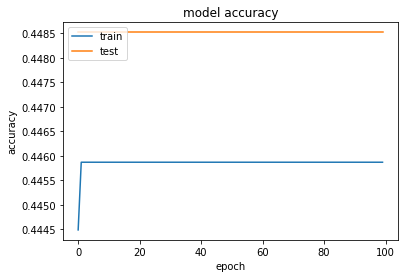

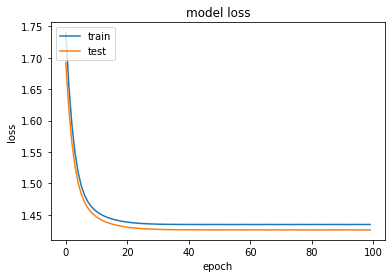

In [26]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(256, activation='relu', kernel_initializer= keras.initializers.Zeros() ),
  layers.Dense(512, activation='relu'),
  layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(train_ds, validation_data=test_ds,epochs=100)

history = model.fit(train_ds, validation_data=test_ds,epochs=100)


import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()